# Testing MACE's robustness

In [3]:

import matplotlib           as mpl
import matplotlib.pyplot    as plt
import numpy               as np
import matplotlib.lines     as mlines

from matplotlib          import rcParams, rc
rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'font.size': 10})
rc('font', family='serif')
rc('text', usetex=True)

from pathlib import Path
import sys

parentpath = str(Path().cwd())[:-16]

sys.path.append(parentpath)

import src.mace.test            as test
import src.mace.load            as load
import src.mace.utils            as utils


dt_fracts = {4 : 0.296, 5: 0.269,8: 0.221,10: 0.175,12: 0.146,16: 0.117,20: 0.09,25: 0.078,32: 0.062,48: 0.043,64: 0.033,128: 0.017}

%reload_ext autoreload
%autoreload 2

## Models

In [4]:
outloc  = '/STER/silkem/MACE/models/CSE_0D/'
test1 = '20240605_165012'
test2 = '20240605_165111'
test3 = '20240605_165130'
test4 = '20240605_165146'
test5 = '20240605_165203'
test6 = '20240605_165309'
# test7 = '20240605_165905'
# test8 = '20240605_170018'
# test9 = '20240605_170030'
# test10 = '20240605_170046'
test7 = '20240816_121317'
test8 = '20240816_121529'
test9 = '20240816_121601'
test10 = '20240816_121625'
test20 = '20240816_121735'
test0 = '20240816_121757'

tests = [test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test0]
# tests = [test7, test8, test9, test10, test20, test0]

### Predicting & saving

### Loading predictions

In [5]:
## test1
savepath = outloc + test1 + '/results/' 
n = np.load(savepath+'n.npy') 
n_evol1 = np.load(savepath+'n_evol.npy')
err_evol1 = np.load(savepath+'err_evol.npy')
print('Loading test1 done') 

## test2
savepath = outloc + test2 + '/results/' 
n_evol2 = np.load(savepath+'n_evol.npy')
err_evol2 = np.load(savepath+'err_evol.npy')
print('Loading test2 done')

## test3
savepath = outloc + test3 + '/results/'
n_evol3 = np.load(savepath+'n_evol.npy')
err_evol3 = np.load(savepath+'err_evol.npy')
print('Loading test3 done')

## test4
savepath = outloc + test4 + '/results/'
n_evol4 = np.load(savepath+'n_evol.npy')
err_evol4 = np.load(savepath+'err_evol.npy')
print('Loading test4 done')

## test5
savepath = outloc + test5 + '/results/'
n_evol5 = np.load(savepath+'n_evol.npy')
err_evol5 = np.load(savepath+'err_evol.npy')
print('Loading test5 done')

## test6
savepath = outloc + test6 + '/results/'
n_evol6 = np.load(savepath+'n_evol.npy')
err_evol6 = np.load(savepath+'err_evol.npy')
print('Loading test6 done')

## test7
savepath = outloc + test7 + '/results/'
n_evol7 = np.load(savepath+'n_evol.npy')
err_evol7 = np.load(savepath+'err_evol.npy')
print('Loading test7 done')

## test8
savepath = outloc + test8 + '/results/'
n_evol8 = np.load(savepath+'n_evol.npy')
err_evol8 = np.load(savepath+'err_evol.npy')
print('Loading test8 done')

## test9
savepath = outloc + test9 + '/results/'
n_evol9 = np.load(savepath+'n_evol.npy')
err_evol9 = np.load(savepath+'err_evol.npy')
print('Loading test9 done')

## test10
savepath = outloc + test10 + '/results/'
n_evol10 = np.load(savepath+'n_evol.npy')
err_evol10 = np.load(savepath+'err_evol.npy')
print('Loading test10 done')

## test20
savepath = outloc + test20 + '/results/'
n_evol20 = np.load(savepath+'n_evol.npy')
# err_evol20 = np.load(savepath+'err_evol.npy')
print('Loading test20 done')

## test0
savepath = outloc + test0 + '/results/'
n_evol0 = np.load(savepath+'n_evol.npy')
err_evol0 = np.load(savepath+'err_evol.npy')
print('Loading test0 done')



Loading test1 done
Loading test2 done
Loading test3 done
Loading test4 done
Loading test5 done
Loading test6 done
Loading test7 done
Loading test8 done
Loading test9 done
Loading test10 done
Loading test20 done
Loading test0 done


## Plotting robustness

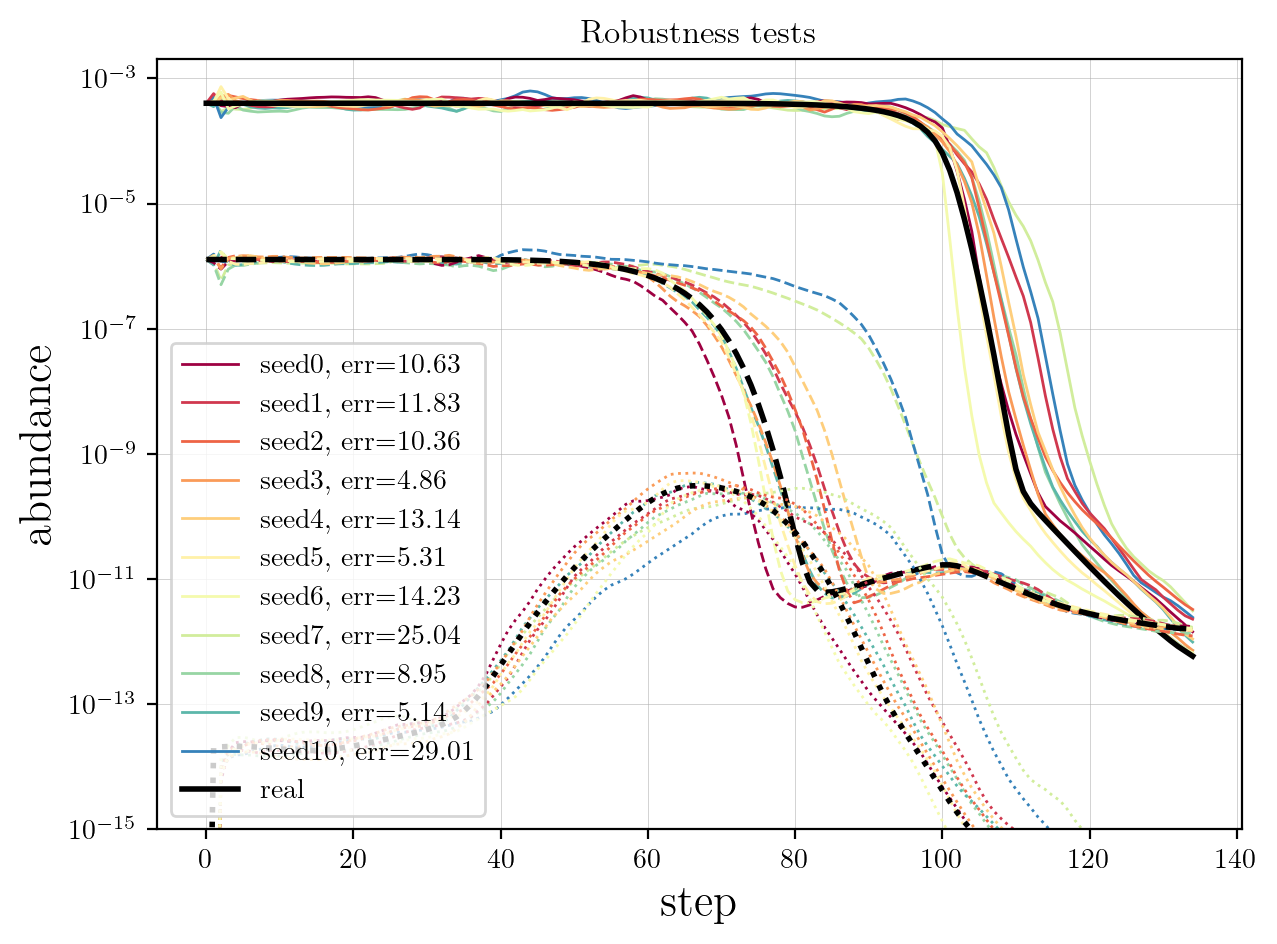

In [6]:


specs = [71, 36, 149]
ls = ['-', '--', ':']
lw = 1

# Select a colormap
cmap = plt.cm.Spectral



# Generate colors from the colormap
colors = [cmap(i) for i in np.linspace(0, 1, len(tests)+1)]

fig, ax1 = plt.subplots(1,1,figsize=(7, 5))
ax1.set_title("Robustness tests")

l_test1 = mlines.Line2D([],[], color = colors[1], ls = '-',   label='seed1, err='+str(round(float(err_evol1),2)),lw = lw)
l_test2 = mlines.Line2D([],[], color = colors[2], ls = '-',   label='seed2, err='+str(round(float(err_evol2),2)),lw = lw)
l_test3 = mlines.Line2D([],[], color = colors[3], ls = '-',   label='seed3, err='+str(round(float(err_evol3),2)),lw = lw)
l_test4 = mlines.Line2D([],[], color = colors[4], ls = '-',   label='seed4, err='+str(round(float(err_evol4),2)),lw = lw)
l_test5 = mlines.Line2D([],[], color = colors[5], ls = '-',   label='seed5, err='+str(round(float(err_evol5),2)),lw = lw)
l_test6 = mlines.Line2D([],[], color = colors[6], ls = '-',   label='seed6, err='+str(round(float(err_evol6),2)),lw = lw)
l_test7 = mlines.Line2D([],[], color = colors[7], ls = '-',   label='seed7, err='+str(round(float(err_evol7),2)),lw = lw)
l_test8 = mlines.Line2D([],[], color = colors[8], ls = '-',   label='seed8, err='+str(round(float(err_evol8),2)),lw = lw)
l_test9 = mlines.Line2D([],[], color = colors[9], ls = '-',   label='seed9, err='+str(round(float(err_evol9),2)),lw = lw)
l_test10 = mlines.Line2D([],[], color = colors[10], ls = '-', label='seed10, err='+str(round(float(err_evol10),2)),lw = lw)
# l_test20 = mlines.Line2D([],[], color = colors[11], ls = '-', label='test20',lw = lw)
l_test0 = mlines.Line2D([],[], color = colors[0], ls = '-', label='seed0, err='+str(round(float(err_evol0),2)),lw = lw)
l_real = mlines.Line2D([],[], color = 'k', ls = '-', label='real',lw = lw+1)

# handles = [l_test1, l_test2, l_test3, l_test4, l_test5, l_test6, l_real]
handles = [l_test0,l_test1, l_test2, l_test3, l_test4, l_test5, l_test6, l_test7, l_test8, l_test9, l_test10,  l_real]
        

for k,i in enumerate(specs):

    ax1.plot(n_evol7[:,i], linestyle = ls[k], color = colors[7],lw = lw)
    ax1.plot(n_evol8[:,i], linestyle = ls[k], color = colors[8],lw = lw)
    ax1.plot(n_evol9[:,i],  linestyle = ls[k], color = colors[9],lw = lw)
    ax1.plot(n_evol10[:,i],  linestyle = ls[k], color = colors[10],lw = lw)
    # ax1.plot(n_evol20[:,i], linestyle = ls[k], color = colors[11],lw = lw)
    ax1.plot(n_evol0[:,i], linestyle = ls[k], color = colors[0],lw = lw)

    ax1.plot(n_evol1[:,i], linestyle = ls[k], color = colors[1],lw = lw)
    ax1.plot(n_evol2[:,i], linestyle = ls[k], color = colors[2],lw = lw)
    ax1.plot(n_evol3[:,i],linestyle = ls[k], color = colors[3],lw = lw)
    ax1.plot(n_evol4[:,i], linestyle = ls[k], color = colors[4],lw = lw)
    ax1.plot(n_evol5[:,i], linestyle = ls[k], color = colors[5],lw = lw)
    ax1.plot(n_evol6[:,i], linestyle = ls[k], color = colors[6],lw = lw)

    ax1.plot(n[:,i], 'k',  linestyle = ls[k],lw = lw+1)

ax1.set_xlabel('step', fontsize = 16)
ax1.set_ylabel('abundance', fontsize = 16)

ax1.grid(True, lw = 0.2)

ax1.set_ylim(1e-15, 2e-3)

ax1.legend(handles = handles, loc = 'lower left')
ax1.set_yscale('log')
plt.show()